In [0]:
!pip3 install -U seaborn


Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data.
df = pd.read_csv("https://raw.githubusercontent.com/12ani/Taarifa_water_table/master/training_set_values.csv")
labels = pd.read_csv("https://raw.githubusercontent.com/12ani/Taarifa_water_table/master/training_set_labels.csv")

# Merge data and labels together in one dataframe.
df = pd.merge(df, labels, on='id')
del labels

In [0]:

# Data set description 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [0]:
# Check for null values 

df.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

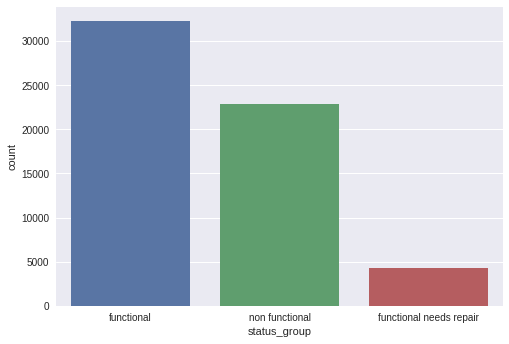

status_group
functional                 32259
functional needs repair     4317
non functional             22824
dtype: int64

In [0]:
#visual representation to get better picture about the dataset 

#count of status_group (functional, non-functional, needs repair)
plt.figure()
sns.countplot(df.status_group)
plt.show()
df.groupby(['status_group']).size()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

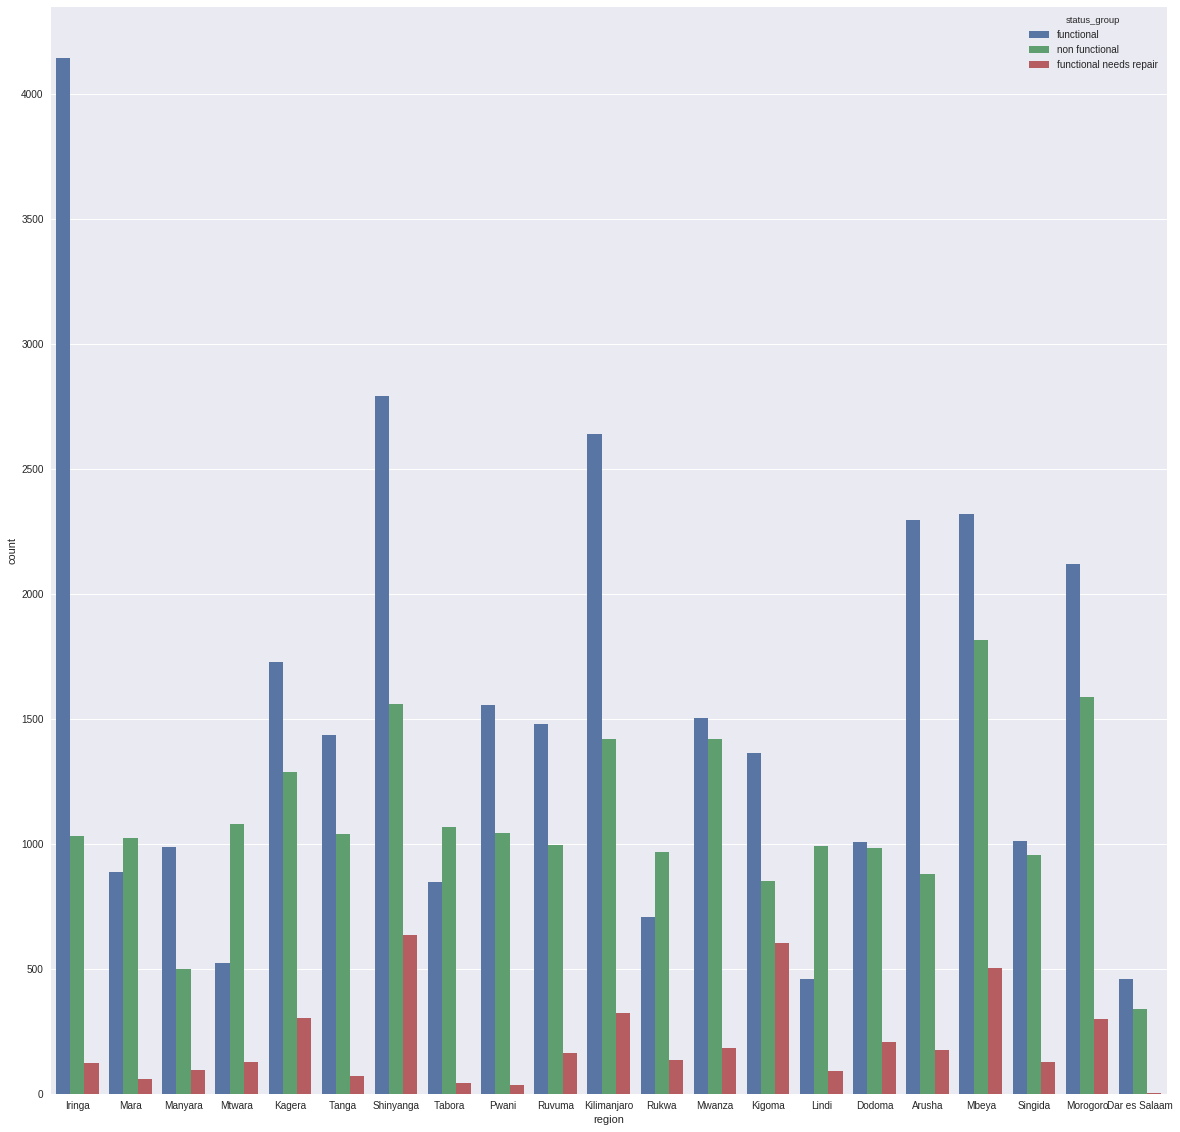

In [0]:
# Status_group with respect to region 
plt.figure(figsize=(20,20))
sns.countplot(data=df,x='region',hue='status_group')
df.region.value_counts()


In [0]:
#Stus_group with respect to area 
plt.figure()
sns.scatterplot(data=df,x='latitude', y='longitude',hue='status_group')
plt.ylim(25,50)
plt.show()

AttributeError: ignored

In [0]:
# water qaulity w.r.t status group 
plt.figure(figsize=(15,15))
sns.countplot(data=df,x='water_quality',hue='status_group')
df.water_quality.value_counts()

#Since, majority of pumps lie in 'soft' category. There is not much variance 
#in this column. 
#We might drop this column. 

In [0]:
plt.figure(figsize=(15,15))
sns.countplot(data=df,x='district_code',hue='status_group')
df.district_code.value_counts()

In [0]:
plt.figure(figsize=(15,15))
sns.countplot(data=df,x='ward',hue='status_group')
plt.ylim(0,150)
df.ward.value_counts()

In [0]:
#There are some features that we can remve right away just by looking at the data.
#Apart from these, other features are evaluated later in the code

In [0]:
#Drop redundant or similar columns 
df = df.drop(columns = ['wpt_name','extraction_type','extraction_type_group','extraction_type_class','scheme_name','payment_type','quantity_group','source_type','waterpoint_type_group','quality_group','source','management'])

In [0]:
#Drop location features 
df= df.drop(columns = ['gps_height', 'longitude', 'latitude', 'region_code', 'district_code','region', 'lga', 'ward'])

In [0]:
#Drop columns with insignificant values
#both the columns have single value
df= df.drop(columns = ['recorded_by','num_private'])




In [0]:
#Keeping only funders above 500 count
def funder_top500(row):  
    '''Keep top 5 values and set the rest to 'other'''

    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank' 
    elif row['funder']=='Kkkt':
        return 'Kkkt'    
    elif row['funder']=='World Vision':
        return 'World Vision'
    elif row['funder']=='Unicef':
        return 'Unicef' 
    elif row['funder']=='Tasaf':
        return 'Tasaf' 
    elif row['funder']=='Dhv':
        return 'Dhv' 
    elif row['funder']=='Private Individual':
        return 'Private Individual' 
    elif row['funder']=='Dwsp':
        return 'Dwsp' 
    elif row['funder']=='Norad':
        return 'Norad' 
    elif row['funder']=='Germany Republi':
        return 'Germany Republi'
    elif row['funder']=='Ministry Of Water':
        return 'Ministry Of Water'
    elif row['funder']=='Tcrs':
        return 'Tcrs'
    elif row['funder']=='Water':
        return 'Water'
    else:
        return 'other'
    
df['funder'] = df.apply(lambda row: funder_top500(row), axis=1)

other                 32194
gov                    9084
danida                 3114
hesawa                 2202
rwssp                  1374
world_bank             1349
Kkkt                   1287
World Vision           1246
Unicef                 1057
Tasaf                   877
Dhv                     829
Private Individual      826
Dwsp                    811
Norad                   765
Germany Republi         610
Tcrs                    602
Ministry Of Water       590
Water                   583
Name: funder, dtype: int64

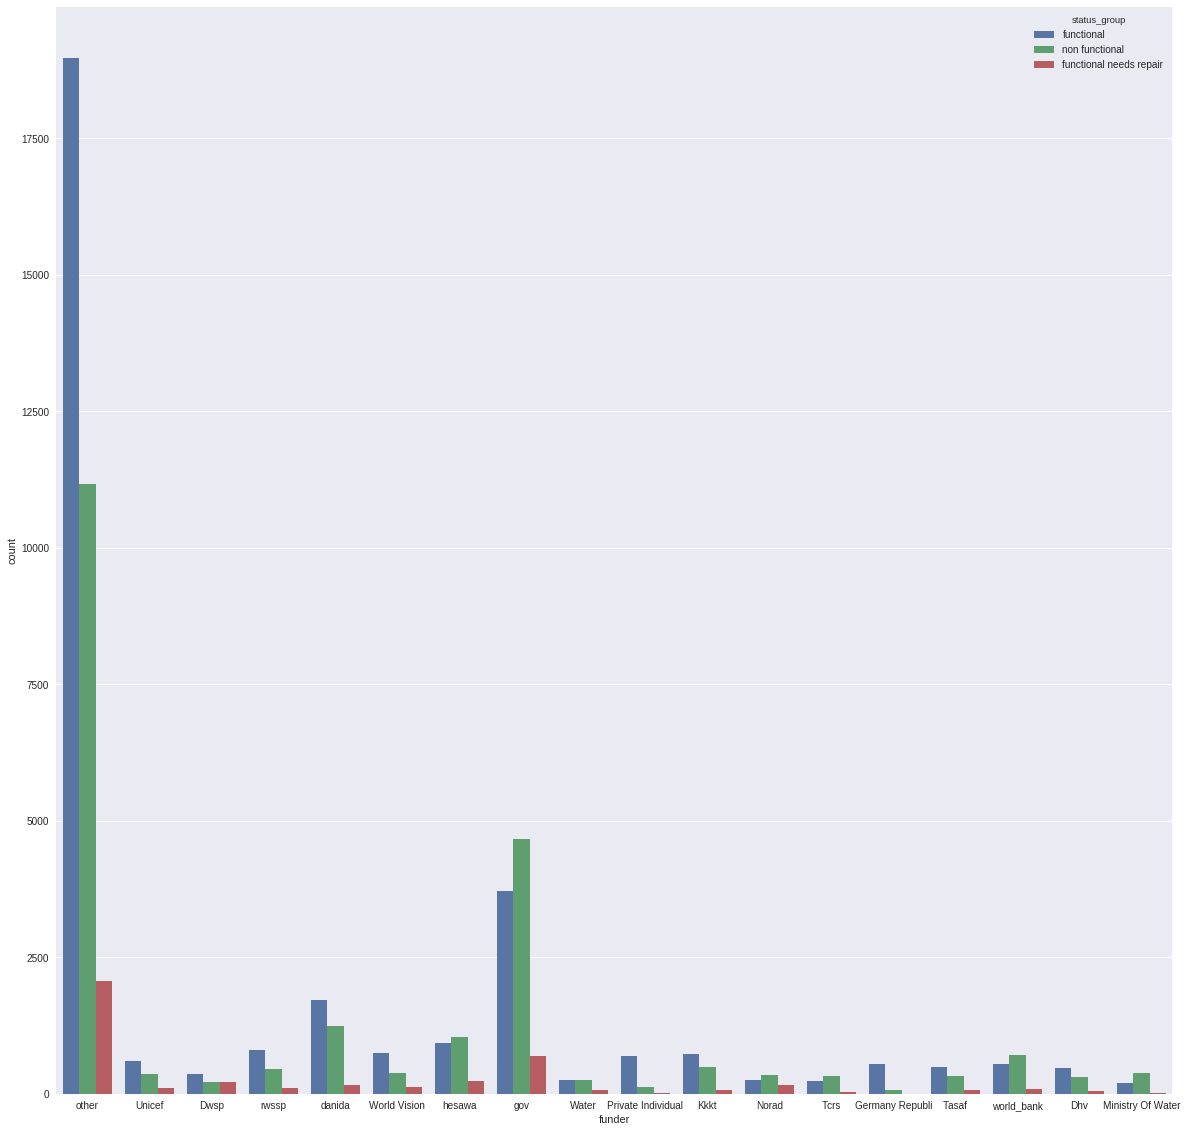

In [0]:
plt.figure(figsize=(20,20))
sns.countplot(data=df,x='funder',hue='status_group')
df.funder.value_counts()

In [0]:
#Addiing new column called 'status_group_int' to make pivot table in order to 
# see status of pumps between the different funders.

vals_to_replace = {'functional':2, 'functional needs repair':1,
                   'non functional':0}

df['status_group_int']  = df.status_group.replace(vals_to_replace)

In [0]:
piv_table = pd.pivot_table(df,index=['funder','status_group'],
                           values='status_group_int', aggfunc='count')
piv_table

status_group_int
funder             status_group                             
Dhv                functional                            469
                   functional needs repair                59
                   non functional                        301
Dwsp               functional                            371
                   functional needs repair               225
                   non functional                        215
Germany Republi    functional                            538
                   functional needs repair                 1
                   non functional                         71
Kkkt               functional                            723
                   functional needs repair                66
                   non functional                        498
Ministry Of Water  functional                            192
                   functional needs repair                19
                   non functional                        379
Norad              functional                            259
                   functional needs repair               165
                   non functional                        341
Private Individual functional                            690
                   functional needs repair                18
                   non functional                        118
Tasaf              functional                            493
                   functional needs repair                64
                   non functional                        320
Tcrs               functional                            241
                   functional needs repair                37
                   non functional                        324
Unicef             functional                            600
                   functional needs repair                99
                   non functional                        358
Water              functional                            258
                   functional needs repair                78
                   non functional                        247
World Vision       functional                            743
                   functional needs repair               131
                   non functional                        372
danida             functional                           1713
                   functional needs repair               159
                   non functional                       1242
gov                functional                           3720
                   functional needs repair               701
                   non functional                       4663
hesawa             functional                            936
                   functional needs repair               232
                   non functional                       1034
other              functional                          18963
                   functional needs repair              2057
                   non functional                      11174
rwssp              functional                            805
                   functional needs repair               109
                   non functional                        460
world_bank         functional                            545
                   functional needs repair                97
                   non functional                        707

In [0]:
# For the feature 'installer'


df.installer.value_counts()

other                 30985
dwe                   17402
gov                    1825
Hesawa                 1379
rwe                    1206
commu                  1060
danida                 1050
KKKT                    898
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
Name: installer, dtype: int64

In [0]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def installer_top500(row):
    '''Keep top 5 values and set the rest to 'other'''
    if row['installer']=='DWE':
        return 'dwe'
    elif row['installer']=='Government':
        return 'gov'
    elif row['installer']=='RWE':
        return 'rwe'
    elif row['installer']=='Commu':
        return 'commu'
    elif row['installer']=='DANIDA':
        return 'danida'
    elif row['installer']=='KKKT':
        return 'KKKT'
    elif row['installer']=='Hesawa' or row['installer']=='HESAWA':
        return 'Hesawa'
    elif row['installer']=='TCRS':
        return 'TCRS'
    elif row['installer']=='Central government':
        return 'Central government'
    elif row['installer']=='CES':
        return 'CES'
    elif row['installer']=='Community':
        return 'Community'
    elif row['installer']=='DANID':
        return 'DANID'
    elif row['installer']=='District Council':
        return 'District Council'
     
    else:
        return 'other'  

df['installer'] = df.apply(lambda row: installer_top500(row), axis=1)

other                 53528
Hesawa                 1379
KKKT                    898
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
Name: installer, dtype: int64

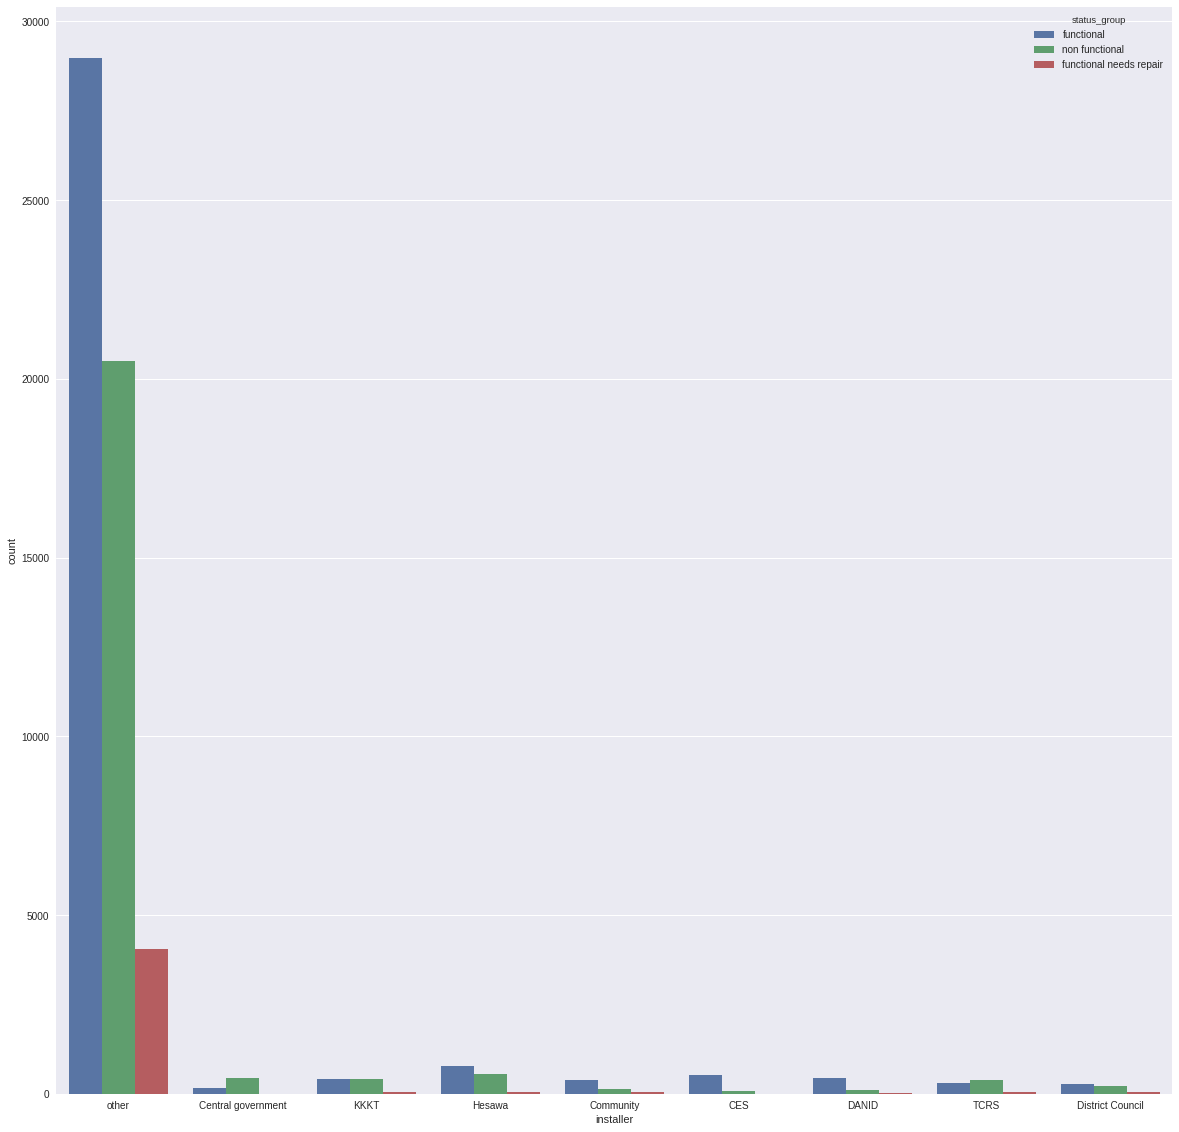

In [0]:
plt.figure(figsize=(20,20))
sns.countplot(data=df,x='installer',hue='status_group')
df.installer.value_counts()

In [0]:
piv_table = pd.pivot_table(df,index=['installer','status_group'],
                           values='status_group_int', aggfunc='count')
piv_table

status_group_int
installer          status_group                             
CES                functional                            538
                   functional needs repair                 1
                   non functional                         71
Central government functional                            168
                   functional needs repair                 4
                   non functional                        450
Community          functional                            386
                   functional needs repair                40
                   non functional                        127
DANID              functional                            431
                   functional needs repair                 9
                   non functional                        112
District Council   functional                            280
                   functional needs repair                48
                   non functional                        223
Hesawa             functional                            777
                   functional needs repair                53
                   non functional                        549
KKKT               functional                            422
                   functional needs repair                62
                   non functional                        414
TCRS               functional                            290
                   functional needs repair                42
                   non functional                        375
other              functional                          28967
                   functional needs repair              4058
                   non functional                      20503

In [0]:

# The next feature to inspect is 'subvillage'.
print(df.subvillage.value_counts())
#We can see that there is not much variance in the subvillage column, hence we can drop it. 

Madukani          508
Shuleni           506
Majengo           502
Kati              373
Mtakuja           262
Sokoni            232
M                 187
Muungano          172
Mbuyuni           164
Mlimani           152
Songambele        147
Miembeni          134
Msikitini         134
1                 132
Kibaoni           114
Kanisani          111
Mapinduzi         109
I                 109
Mjini             108
Mjimwema          108
Mkwajuni          104
Mwenge            102
Mabatini           98
Azimio             98
Mission            95
Mbugani            95
Bwawani            91
Bondeni            90
Chang'Ombe         88
Zahanati           86
                 ... 
Humbo               1
Nyailungu           1
Likweje A           1
Mwamagiri           1
Bulanda             1
Rujebe              1
Kahe Ya Zamani      1
Mvumi B             1
Gumbilo B           1
Ilekebu             1
Maleti              1
Ndughwila           1
Chamwandu           1
Kwebua A            1
Nyarusonzo

In [0]:
#To verify our assumption, we can compute the the unique values in this feature. 
print('Unique villages: ', len(df.subvillage.value_counts()))


('Unique villages: ', 19287)


In [0]:
#since, it has 19287 unique values, it won't carry much variance in the dataset

df = df.drop('subvillage', axis=1)

# Next feature to process public_meeting

df.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [0]:
#Let's keep this column since it has only two values. Also, subsituting the NA values with 'unknown'
df.public_meeting = df.public_meeting.fillna('Unknown')

# Next fearure is 'scheme_management'
df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [0]:
# Lets keep values above 1000 and assign the rest as 'other' 

def scheme_top1000(row):
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    elif row['scheme_management']=='Parastatal':
        return 'Parastatal'
    elif row['scheme_management']=='Private operator':
        return 'Private operator'
    elif row['scheme_management']=='Company':
        return 'Company'
    else:
        return 'other'

      
df['scheme_management'] = df.apply(lambda row: scheme_top1000(row), axis=1)


vwc                 36793
wug                  5206
other                4813
wtr_auth             3153
wua                  2883
wtr_brd              2748
Parastatal           1680
Private operator     1063
Company              1061
Name: scheme_management, dtype: int64

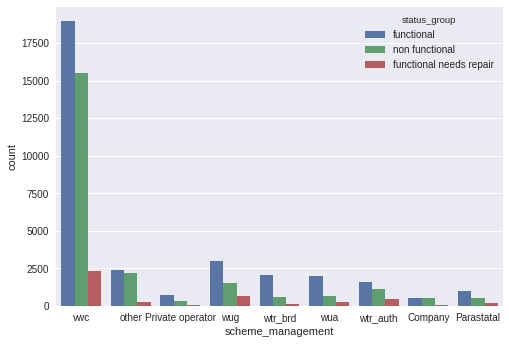

In [0]:
plt.figure()
sns.countplot(data=df,x='scheme_management',hue='status_group')
df.scheme_management.value_counts()

In [0]:
piv_table = pd.pivot_table(df, index=['scheme_management', 'status_group'],
                           values='status_group_int', aggfunc='count')
piv_table

status_group_int
scheme_management status_group                             
Company           functional                            534
                  functional needs repair                37
                  non functional                        490
Parastatal        functional                            966
                  functional needs repair               202
                  non functional                        512
Private operator  functional                            729
                  functional needs repair                23
                  non functional                        311
other             functional                           2398
                  functional needs repair               251
                  non functional                       2164
vwc               functional                          18960
                  functional needs repair              2334
                  non functional                      15499
wtr_auth          functional                           1618
                  functional needs repair               448
                  non functional                       1087
wtr_brd           functional                           2053
                  functional needs repair               111
                  non functional                        584
wua               functional                           1995
                  functional needs repair               239
                  non functional                        649
wug               functional                           3006
                  functional needs repair               672
                  non functional                       1528

In [0]:
#'permit' is the last column with null values 
df.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [0]:
#Just like the feature 'public_meeting' it has only 2 values but with better count ratio
#We will keeo this column and replace the NA values with null

df.permit = df.permit.fillna('Unknown')

In [0]:
#checking for null values in the columns 
df.apply(lambda x: sum(x.isnull()))

id                   0
amount_tsh           0
date_recorded        0
funder               0
installer            0
basin                0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
management_group     0
payment              0
water_quality        0
quantity             0
source_class         0
waterpoint_type      0
status_group         0
status_group_int     0
dtype: int64

In [0]:
# string values and modify or remove them as we see fit.

str_cols = df.select_dtypes(include = ['object'])
str_cols.apply(lambda x: len(x.unique()))

date_recorded        356
funder                18
installer             14
basin                  9
public_meeting         3
scheme_management      9
permit                 3
management_group       5
payment                7
water_quality          8
quantity               5
source_class           3
waterpoint_type        7
status_group           3
dtype: int64

In [0]:
# 'Date recorded'

df.date_recorded.describe()

count       59400
unique        356
top       3/15/11
freq          572
Name: date_recorded, dtype: object

In [0]:
#Converting 'date_recorded' into Datetime format. We assume that the most recently recorded data might
#have higher probability of having functional pump. 
#We can obtain this by subtracting all dates with the lastest recorded date


df.date_recorded = pd.to_datetime(df.date_recorded)
df.date_recorded.describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [0]:
# The most recent data is 2013-12-03. Subtract each date from this point to obtain a 
# 'days_since_recorded' column. This 

df.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(df.date_recorded)
df.columns = ['days_since_recorded' if x=='date_recorded' else x for x in df.columns]
df.days_since_recorded = df.days_since_recorded.astype('timedelta64[D]').astype(int)
df.days_since_recorded.describe()

count    59400.000000
mean       613.616970
std        334.216374
min          0.000000
25%        297.000000
50%        419.000000
75%        977.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

In [0]:
df.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [0]:
piv_table = pd.pivot_table(df, index=['basin', 'status_group'],
                           values=['status_group_int'], aggfunc='count')
piv_table



status_group_int
basin                   status_group                             
Internal                functional                           4482
                        functional needs repair               557
                        non functional                       2746
Lake Nyasa              functional                           3324
                        functional needs repair               250
                        non functional                       1511
Lake Rukwa              functional                           1000
                        functional needs repair               270
                        non functional                       1184
Lake Tanganyika         functional                           3107
                        functional needs repair               742
                        non functional                       2583
Lake Victoria           functional                           5100
                        functional needs repair               989
                        non functional                       4159
Pangani                 functional                           5372
                        functional needs repair               477
                        non functional                       3091
Rufiji                  functional                           5068
                        functional needs repair               437
                        non functional                       2471
Ruvuma / Southern Coast functional                           1670
                        functional needs repair               326
                        non functional                       2497
Wami / Ruvu             functional                           3136
                        functional needs repair               269
                        non functional                       2582

In [0]:
# Most of the basins value have high number of functional pumps, therefore it seems
# like a good feature to keep. 

In [0]:
str_cols.apply(lambda x: len(x.unique()))

date_recorded        356
funder                18
installer             14
basin                  9
public_meeting         3
scheme_management      9
permit                 3
management_group       5
payment                7
water_quality          8
quantity               5
source_class           3
waterpoint_type        7
status_group           3
dtype: int64

In [0]:
#construction_year feature only has the year if construction of the pump, we assume 
# the more old the construction year is the more likely the pump will be non-functional or will need repair
df.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [0]:
# changing the values of construction year into 60s, 70s, 80s,.....10s to eliminate 
# scattered values like 1960, 1964 can fall under 60s

def construction_00(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
df['construction_year'] = df.apply(lambda row: construction_00(row), axis=1)

unknown    20709
00s        15330
90s         7678
80s         5578
10s         5161
70s         4406
60s          538
Name: construction_year, dtype: int64

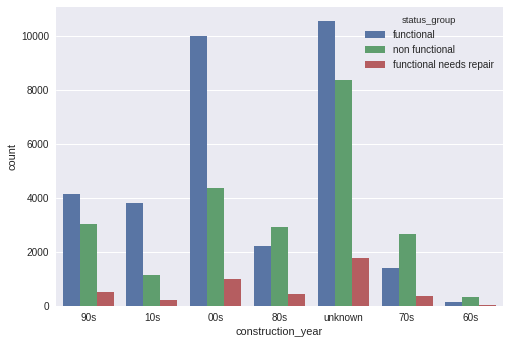

In [0]:
plt.figure()
sns.countplot(data=df,x='construction_year',hue='status_group')
df.construction_year.value_counts()

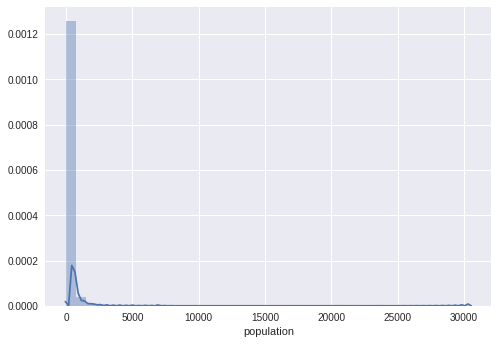

In [0]:
sns.distplot(df.population, bins = 40)
plt.show()

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 19 columns):
id                     59400 non-null int64
amount_tsh             59400 non-null float64
days_since_recorded    59400 non-null int64
funder                 59400 non-null object
installer              59400 non-null object
basin                  59400 non-null object
population             59400 non-null int64
public_meeting         59400 non-null object
scheme_management      59400 non-null object
permit                 59400 non-null object
construction_year      59400 non-null object
management_group       59400 non-null object
payment                59400 non-null object
water_quality          59400 non-null object
quantity               59400 non-null object
source_class           59400 non-null object
waterpoint_type        59400 non-null object
status_group           59400 non-null object
status_group_int       59400 non-null int64
dtypes: float64(1), int64(4), object(14

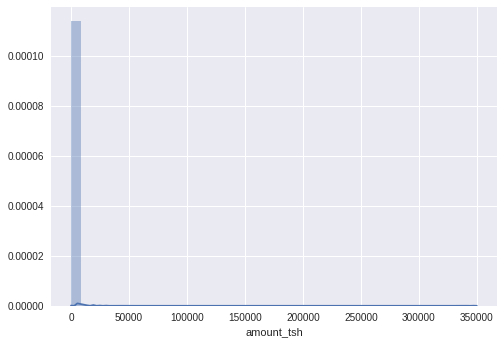

In [0]:

sns.distplot(df.amount_tsh, bins = 40)
plt.show()

In [0]:

df.population.describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [0]:
df.amount_tsh.describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [0]:
# There is enough variation between the two, hence we can keep it in our model.
# Let's save the dataframe to a new csv file. We'll start creating models in the next notebooks.
df = df.drop('status_group_int', 1)
df.to_csv('water_table_train.csv', index=False)

In [0]:
# We'll also need to perform the same modifications to the test set.

test = pd.read_csv('https://raw.githubusercontent.com/12ani/Taarifa_water_table/master/test_set_values.csv')

test = test.drop(['wpt_name','extraction_type','extraction_type_group','extraction_type_class',
                  'scheme_name','payment_type','quantity_group','source_type','waterpoint_type_group',
                  'quality_group','source','management','gps_height', 'longitude', 'latitude', 
                  'region_code', 'district_code','region', 'lga', 'ward','recorded_by','num_private',
                 'subvillage'], axis=1)

test.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(test.date_recorded)
test.columns = ['days_since_recorded' if x=='date_recorded' else x for x in test.columns]
test.days_since_recorded = test.days_since_recorded.astype('timedelta64[D]').astype(int)

test.permit = test.permit.fillna('Unknown')
test.public_meeting = test.public_meeting.fillna('Unknown')

test['scheme_management'] = test.apply(lambda row: scheme_top1000(row), axis=1)
test['construction_year'] = test.apply(lambda row: construction_00(row), axis=1)
test['installer'] = test.apply(lambda row: installer_top500(row), axis=1)
test['funder'] = test.apply(lambda row: funder_top500(row), axis=1)

In [0]:
df.shape

(59400, 18)

In [0]:
test.shape

(14850, 17)

In [0]:
test.to_csv('water_table_test.csv', index=False)

In [0]:
from google.colab import files
files.download('water_table_test.csv','pump_train_for_models.csv')